# Lab 2

Due: 9am Monday, February 19

#### Load relevant packages

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.constants as sp
import scipy.integrate as integrate
from IPython.display import display
from qutip import *

## Exercise 1: Harmonic Oscillator Eigenfunctions

(a) Plot the harmonic oscillator potential and the first three energy eigenfunctions. 

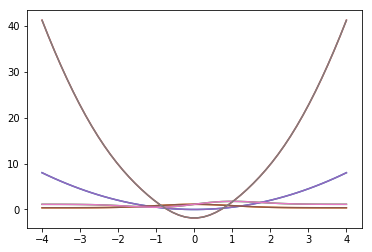

In [4]:
# we choose little_omega and m = 1 for simplicity sake here
little_omega = 1
mass = 1

# define the x values in a linear fashion for easy plotting on the graph 
x_hats = np.linspace(-4,4)

# define the potential function for generating
# the y-axis values for plotting the graph
def potential(m, w, x):
    return 1/2 * m * w**2 * x**2

# initialize empty potential array, generate
# the values associated to the x's and plot them
potentials = []
for x in x_hats:
    potentials.append(potential(mass,little_omega,x))
plt.plot(x_hats, potentials)    
     
# we use hbar = 1 for better visualization when plotting  
alpha = mass * little_omega * 1        
    
# initialize and fill array of ys for eigenfunctions computations
# information taken from this link:
# http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hosc5.html
ys = []
for x in x_hats:
    ys.append(math.sqrt(alpha) * x)

# initialize the array that will contain the y data for the eigenfunctions
psi_0s = []
psi_1s = []
psi_2s = []

# generate the data for the 3 first eigenfunctions
# from the formula from the previous link
# we add hbar * little_omega per eigenfunction
# to put them at the right level on the plot
for y in ys:
    psi_0s.append((alpha / np.pi)**(1/4) * 
                  (math.exp(-(y**2)/2) + 1/2 * little_omega))
    psi_1s.append((alpha / np.pi)**(1/4) * 
                  (math.sqrt(2)* y * math.exp(-(y**2)/2) + 3/2 * little_omega))  
    psi_2s.append((alpha / np.pi)**(1/4) * 
                  (1/math.sqrt(2)*(2 * y**2 - 1) * 
                   (math.exp(-(y**2)/2) + 5/2 * little_omega)))

# plot everything
plt.plot(x_hats, psi_0s)
plt.plot(x_hats, psi_1s)
plt.plot(x_hats, psi_2s)
plt.show()

## Exercise 2: 2-Level System With Creation and Annihilation Operators

(a) Find the form of the creation operator ($\hat{a}^{\dagger}$) for a 2-level system. That is, find a matrix that maps:
\begin{equation}
    \begin{pmatrix}
        1 \\ 0
    \end{pmatrix}
    \longrightarrow
     \begin{pmatrix}
        0 \\ 1
    \end{pmatrix}
\end{equation}
and:
\begin{equation}
    \begin{pmatrix}
        0 \\ 1
    \end{pmatrix}
    \longrightarrow
     \begin{pmatrix}
        0 \\ 0
    \end{pmatrix}
\end{equation}

In [6]:
# initialize matrices
inpt = Qobj([[1,0],[0,1]])
oupt = Qobj([[0,0],[1,0]])

# 2x2 matrix (creation operator) that performs the mapping defined above
inpt_transpose = inpt.trans()
creation_operator = inpt.trans() * oupt

# show creation operator
display(creation_operator)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]

(b) Given the $\hat{a}^{\dagger}$ you found above, find $a$ and show that it acts as an annihilation operator. 

In [7]:
# creation operator is hermitian conjugate of annihilation operator
annihilation_operator = creation_operator.dag()

# show annihilation operator
display(annihilation_operator)

# show that it works by correctly lowering the states of the input matrix
display(annihilation_operator * inpt)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]

(c) Consider the Hamiltonian $\hat{H} = \hat{a}^{\dagger}\hat{a} + \frac{1}{2}$. Write this operator in terms of the identity operator $\hat{I}$ and $\hat{\sigma}_{z}$. 

In [8]:
# initialize our Hamiltonian
H = creation_operator * annihilation_operator + (1/2)

# define Identity operator and sigma Z operator
I = Qobj([[1,0],[0,1]])
sigma_z = Qobj([[1,0],[0,-1]])

# show the Hamiltonian in term of the previous operators
display(I - (1/2 * sigma_z))

# show H to prove that our H in terms of I and sigma Z operators is correct
display(H)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0. ]
 [0.  1.5]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0. ]
 [0.  1.5]]

(d) Find the expectation value of energy for the state $\left|{\psi}\right\rangle = \frac{1}{\sqrt{2}}\left|{0}\right\rangle + \frac{1}{\sqrt{2}}\left|{1}\right\rangle$.  

In [9]:
# initialize zero and one ket for computations
zero_ket = basis(2,0)
one_ket = basis(2,1)

# define the psi_ket from the problem definition
psi_ket = (1/math.sqrt(2))*zero_ket + (1/math.sqrt(2))*one_ket

# show the expect value of psi_ket on the current Hamiltonian
display(expect(H,psi_ket))

0.9999999999999998

(e) If at time $t=0$ you have the state $\left|\psi\right\rangle$ above, use QuTiP to find the time-evolution of the state for times $t = 0, \frac{\pi}{4},\frac{\pi}{2}, \frac{3\pi}{4}, \pi$ and visualize them on the Bloch sphere. Compare your results to those from exercise 2 on last week's lab and explain the difference.

In [10]:
# defining hbar as 1 for simplicity here
hbar = 1

# analytical form general function for re-usage in 2(e)
# formula for the analytical form is e^(-i * H * t / hbar)
def analytical_form(t):
    return ((-1j * H * t) / hbar).expm()

# array of times for loopping
times = [np.pi/4, np.pi/2, 3*np.pi/4, np.pi]

# empty array of states for later displaying on Bloch
# sphere and adding initial state (psi_ket is our state at t = 0)
states = []
states.append(psi_ket)

# display the initial state
display(psi_ket)

# generate the states for the other times and display them
for time in times:
    state = analytical_form(time) * psi_ket
    states.append(state)
    display(state)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.65328148-0.27059805j]
 [0.27059805-0.65328148j]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.5-0.5j]
 [-0.5-0.5j]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.27059805-0.65328148j]
 [-0.65328148+0.27059805j]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.-0.70710678j]
 [0.+0.70710678j]]

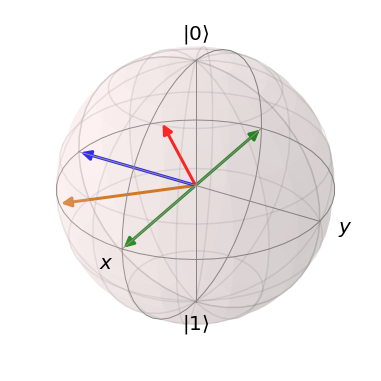

In [11]:
# initialize the Bloch sphere and add the states
b = Bloch()
b.add_states(states)
b.show()

# Comparing results to Lab 1 and explaining the difference

In Lab 1, our qubit rotated from state zero ket to state one ket on the left side of the sphere at 45 degrees angle per time block. As we explained, if this qubit was represented as an electron, this was equivalent to rotating from spin up to spin down. We had a very clear trajectory that the qubit is taking and it was very clear that it was moving from being completely in one state to being completely in a different state.

Here things are a little more subtle. The qubit is never fully in one state or the other (neither fully zero ket or one ket). This is an example of superposition, the fact that under quantum mechanics, a qubit can be at any point between zero ket ("0") and one ket ("1"). The qubit's position in this case start from a superposition of zero ket and one ket and ends up still in a superposition of zero and one ket after going in a circular-like movement. This movement is partly horizontal and partly vertical, but seems to be mainly horizontal, starting on the x axis and finishing on the y axis, but above the half of the sphere.

The other main difference is that in Lab 1, the position of the qubit at various time was always of the format (Real, Imaginary) (as a column vector). Here, we have each component of the qubit's position as a sum of real and imaginary except for the initial starting position, which is what causes the qubit to evolve in a "3D fashion" (not simply being positioned on the axes as it was in Lab 1). 